In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import datetime as dt


In [2]:
df=pd.read_csv("complete.csv",parse_dates=True,index_col='Date')


In [3]:
df.head()


,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
Date,,,,,,,,,
2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0


In [4]:
nation = pd.read_csv('nation_level_daily.csv')


In [5]:
nation.head()


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [6]:
def date(dt):
    l=dt.strip().split()
    if(l[1]=='January'):
        return '2020/01/'+l[0]
    elif(l[1]=='February'):
        return '2020/02/'+l[0]
    elif(l[1]=='March'):
        return '2020/03/'+l[0]
    elif(l[1]=='April'):
        return '2020/04/'+l[0]
    elif(l[1]=='May'):
        return '2020/05/'+l[0]
    elif(l[1]=='June'):
        return '2020/06/'+l[0]
    elif(l[1]=='July'):
        return '2020/07/'+l[0]

In [7]:
nation['Date']=nation['Date'].apply(date)

In [8]:
nation['Date']=pd.to_datetime(nation['Date'])

In [9]:
nation.index=nation['Date']

In [10]:
nation.drop('Date',axis=1,inplace=True)


In [11]:
nation.head()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,
2020-01-30,1,1,0,0,0,0
2020-01-31,0,1,0,0,0,0
2020-02-01,0,1,0,0,0,0
2020-02-02,1,2,0,0,0,0
2020-02-03,1,3,0,0,0,0


In [12]:
nation_test = pd.read_csv('tests_day_wise.csv')


In [13]:
nation_test['Update Time Stamp']=nation_test['Update Time Stamp'].apply(lambda x:x.split()[0])

In [14]:
nation_test['Update Time Stamp'] = pd.to_datetime(nation_test['Update Time Stamp'],dayfirst=True)

In [15]:
nation_test['Month'] = nation_test['Update Time Stamp'].apply(lambda x : x.strftime("%B"))


In [16]:
nation_test.index=nation_test['Update Time Stamp']


In [17]:
nation_test.drop(['Update Time Stamp','Tested As Of'],axis=1,inplace=True)


In [18]:
state_test = pd.read_csv('tests_state_wise.csv')


In [19]:
state_test['Updated On'] = pd.to_datetime(state_test['Updated On'],dayfirst=True)


In [20]:
state_test['Month'] = state_test['Updated On'].apply(lambda x : x.strftime("%B"))


In [21]:
state_test.index = state_test['Updated On']


In [22]:
state_test.drop('Updated On',axis=1,inplace=True)


In [23]:
state_level = pd.read_csv('state_level_latest.csv')


In [24]:
st = state_level.sort_values('Confirmed',ascending=False)[1:11][::-1]['State'].values
con = state_level.sort_values('Confirmed',ascending=False)[1:11][::-1]['Confirmed'].values
de = state_level.sort_values('Confirmed',ascending=False)[1:11][::-1]['Confirmed'].values
re = state_level.sort_values('Recovered',ascending=False)[1:11][::-1]['Confirmed'].values


In [25]:
district_level = pd.read_csv('district_level_latest.csv')


In [26]:
district = district_level.sort_values('Confirmed',ascending=False)[1:11]['District'][::-1].values
values = district_level.sort_values('Confirmed',ascending=False)[1:11]['Confirmed'][::-1].values

In [27]:
top_District = district_level[district_level['Confirmed']!=0].groupby('State').count().sort_values('District',ascending=False)['District'][:10]


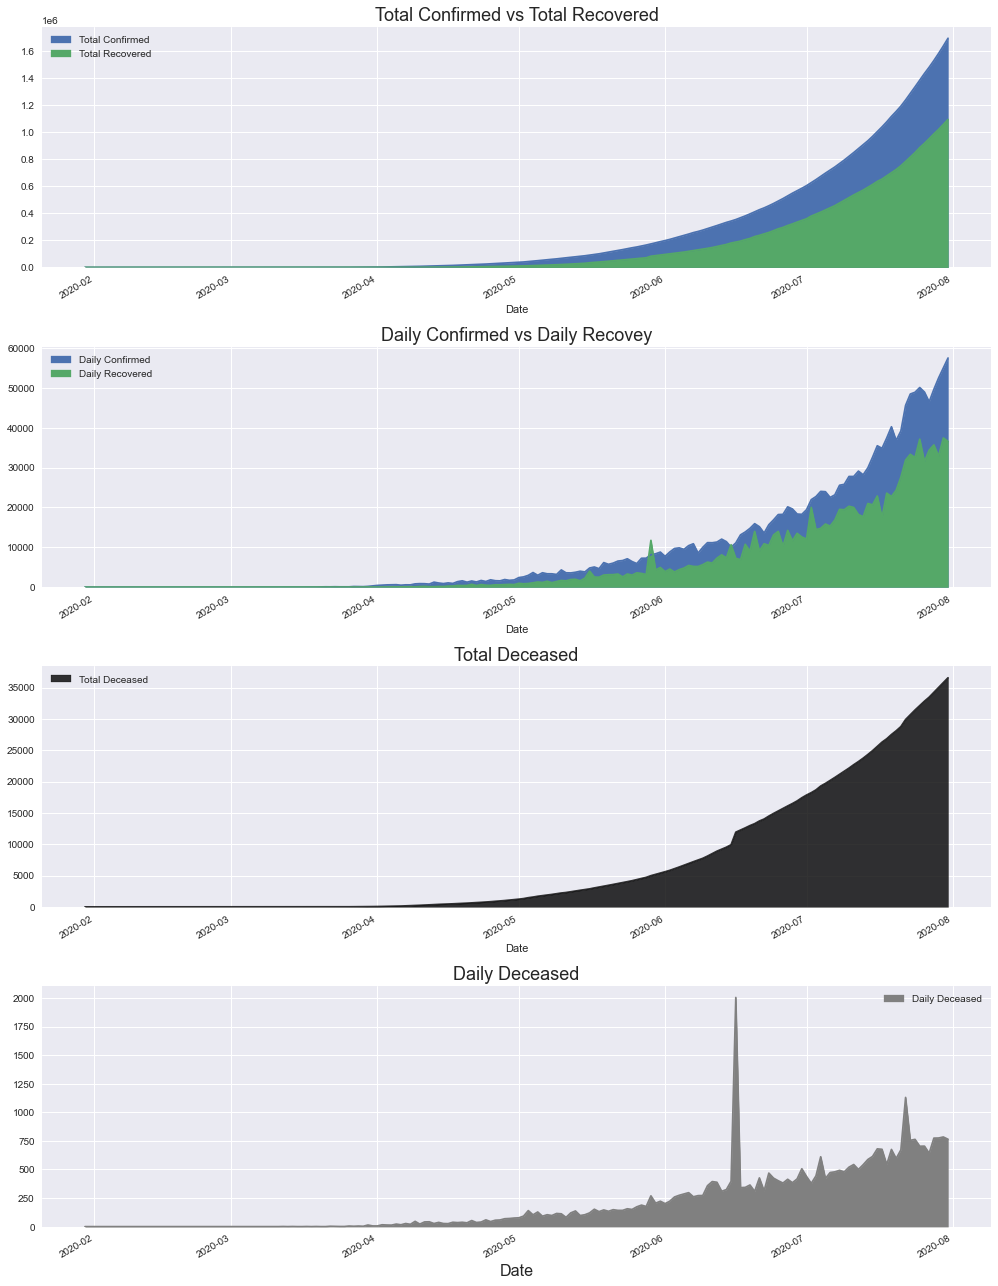

In [28]:
plt.style.use('seaborn')
plt.figure(figsize=(14,18))
#Total Confirmed vs Total Recovery
plt.subplot(4,1,1)
nation['Total Confirmed'].plot.area(legend=True)
nation['Total Recovered'].plot.area(legend=True)
plt.title('Total Confirmed vs Total Recovered',fontsize=18);
plt.tight_layout(pad=1.2)
#Daily Confirmed vs Daily Recoveabsry
plt.subplot(4,1,2)
nation['Daily Confirmed'].plot.area(legend=True)
nation['Daily Recovered'].plot.area(legend=True)
plt.title('Daily Confirmed vs Daily Recovey',fontsize=18);
plt.tight_layout(pad=1.2)
#Total Deceased
plt.subplot(4,1,3)
nation['Total Deceased'].plot.area(legend=True,color='black',alpha=0.8)
plt.title('Total Deceased',fontsize=18);
plt.subplot(4,1,4)
nation['Daily Deceased'].plot.area(legend=True,color='gray')
plt.xlabel('Date',fontsize=16)
plt.title('Daily Deceased',fontsize=18);
plt.tight_layout(pad=1.2)

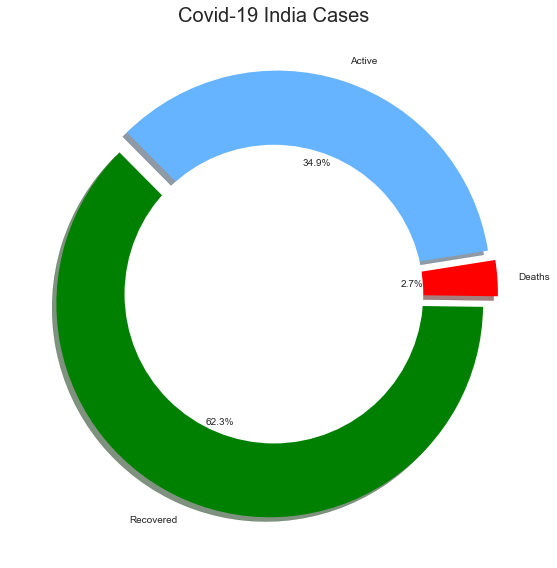

In [29]:
sizes = [277942,496048,21638,]
labels = ['Active', 'Recovered', 'Deaths']
explode = [0.05,0.05,0.05]
plt.figure(figsize=(12,8))
plt.pie(x=sizes,labels=labels,startangle=9,colors=['#66b3ff','green','red'],autopct="%1.1f%%",explode=explode,shadow=True);
plt.title("Covid-19 India Cases",fontsize=20);
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle);
plt.tight_layout()

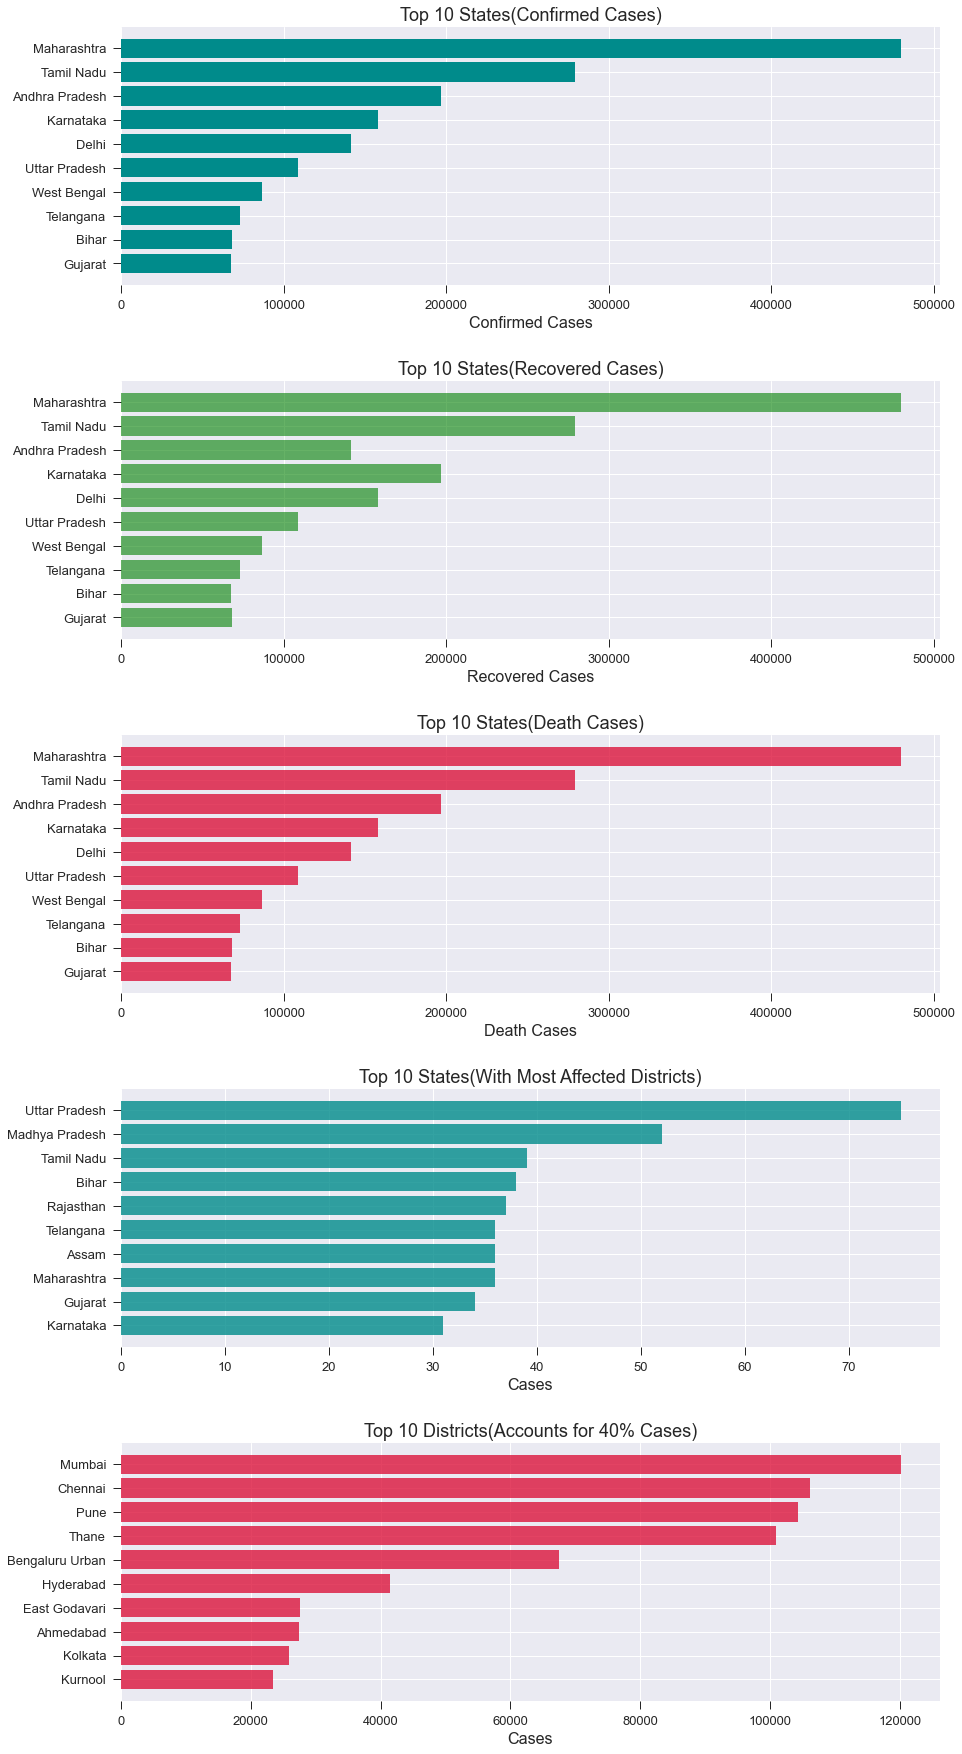

In [30]:
plt.figure(figsize=(14,25))
#Confirmed Cases
plt.subplot(5,1,1)
plt.barh(st,con,color='darkcyan')
plt.tick_params(size=8,labelsize=13)
plt.title('Top 10 States(Confirmed Cases)',fontsize=18)
plt.xlabel('Confirmed Cases',fontsize=16)
#Recovered Cases
plt.subplot(5,1,2)
plt.barh(st,re,color='green',alpha=0.6)
plt.tick_params(size=8,labelsize=13)
plt.title('Top 10 States(Recovered Cases)',fontsize=18);
plt.xlabel('Recovered Cases',fontsize=16)
#Death Cases
plt.subplot(5,1,3)
plt.barh(st,de,color='crimson',alpha=0.8)
plt.tick_params(size=8,labelsize=13)
plt.title('Top 10 States(Death Cases)',fontsize=18);
plt.xlabel('Death Cases',fontsize=16)
plt.tight_layout(pad=3.0)
#Top 10 States with Most Affected Districts
plt.subplot(5,1,4)
plt.barh(top_District[::-1].index,top_District[::-1].values,color='darkcyan',alpha=0.8)
plt.tick_params(size=8,labelsize=13)
plt.title('Top 10 States(With Most Affected Districts)',fontsize=18);
plt.xlabel('Cases',fontsize=16)
plt.tight_layout(pad=3.0)
#Top 10 Districts
plt.subplot(5,1,5)
plt.barh(district,values,color='crimson',alpha=0.8)
plt.tick_params(size=8,labelsize=13)
plt.title('Top 10 Districts(Accounts for 40% Cases)',fontsize=18);
plt.xlabel('Cases',fontsize=16)
plt.tight_layout(pad=3.0)

In [33]:
age_details = pd.read_csv('AgeGroupDetails.csv')
india_covid_19 = pd.read_csv('covid_19_india.csv')
hospital_beds = pd.read_csv('HospitalBedsIndia.csv')
individual_details = pd.read_csv('IndividualDetails.csv')
state_testing = pd.read_csv('StatewiseTestingDetails.csv')
population = pd.read_csv('population_india_census2011.csv')

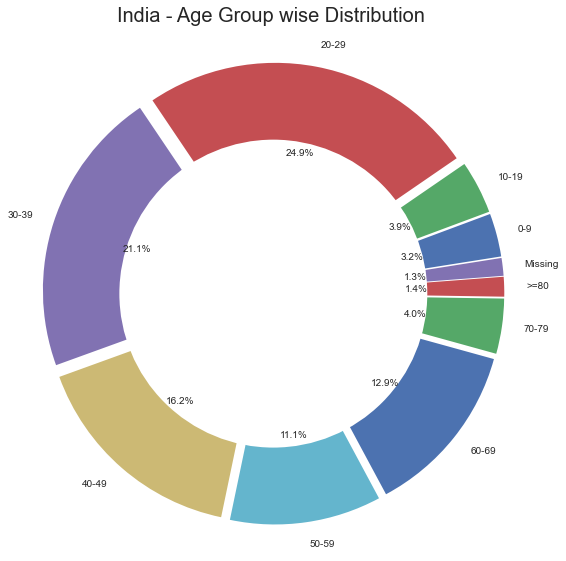

In [41]:
labels = list(age_details['AgeGroup'])
sizes = list(age_details['TotalCases'])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

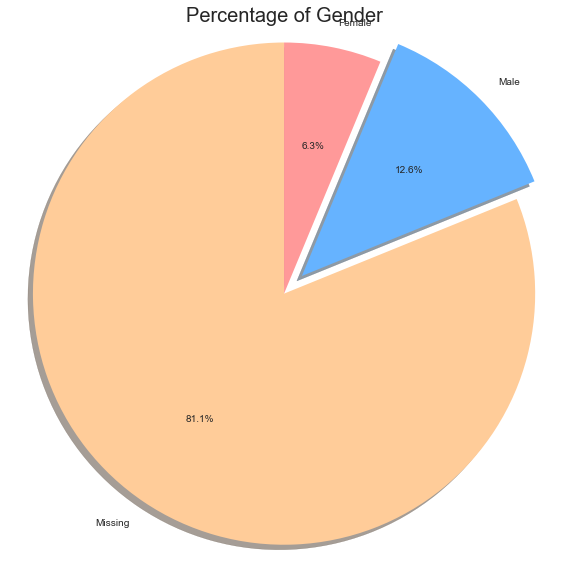

In [39]:
labels = ['Missing', 'Male', 'Female']
sizes = []
sizes.append(individual_details['gender'].isnull().sum())
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])

explode = (0, 0.1, 0)
colors = ['#ffcc99','#66b3ff','#ff9999']

plt.figure(figsize= (8,8))
plt.title('Percentage of Gender',fontsize = 20)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.tight_layout()

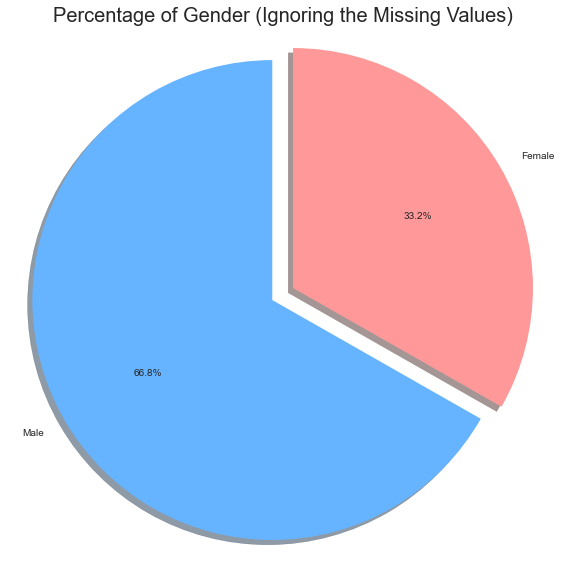

In [40]:

labels = ['Male', 'Female']
sizes = []
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])

explode = (0.1, 0)
colors = ['#66b3ff','#ff9999']

plt.figure(figsize= (8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 20)
plt.axis('equal')
plt.tight_layout()

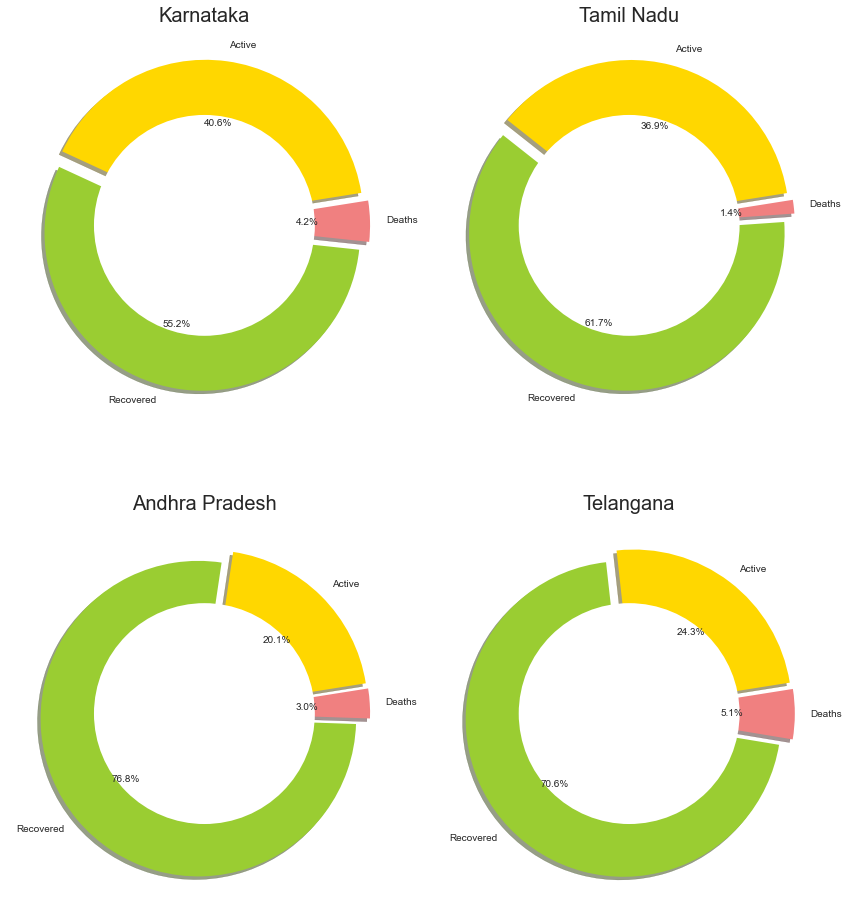

In [42]:
labels = ['Active','Recovered','Deaths']
explode = [0.05,0.05,0.05]
plt.figure(figsize=(12,14))
#Maharashtra
plt.subplot(2,2,1)
plt.pie(x=[ 93654, 127259,9667],labels=labels,startangle=9,colors=['gold', 'yellowgreen', 'lightcoral'],autopct="%1.1f%%",explode=explode,shadow=True);
plt.title('Karnataka',fontsize=20);
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);
#Tamil Nadu
plt.subplot(2,2,2)
plt.pie(x=[46655, 78161,1765],labels=labels,startangle=9,colors=['gold', 'yellowgreen', 'lightcoral'],autopct="%1.1f%%",explode=explode,shadow=True);
plt.title('Tamil Nadu',fontsize=20);
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);
#Delhi
plt.subplot(2,2,3)
plt.pie(x=[21567, 82226,3258],labels=labels,startangle=9,colors=['gold', 'yellowgreen', 'lightcoral'],autopct="%1.1f%%",explode=explode,shadow=True);
plt.title('Andhra Pradesh',fontsize=20);
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);
#Gujarat
plt.subplot(2,2,4)
plt.pie(x=[ 9529, 27742,2009],labels=labels,startangle=9,colors=['gold', 'yellowgreen', 'lightcoral'],autopct="%1.1f%%",explode=explode,shadow=True);
plt.title('Telangana',fontsize=20);
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);
plt.tight_layout()
plt.show();

Text(0.5, 1.0, 'Daily Cases vs Daily Recovery')

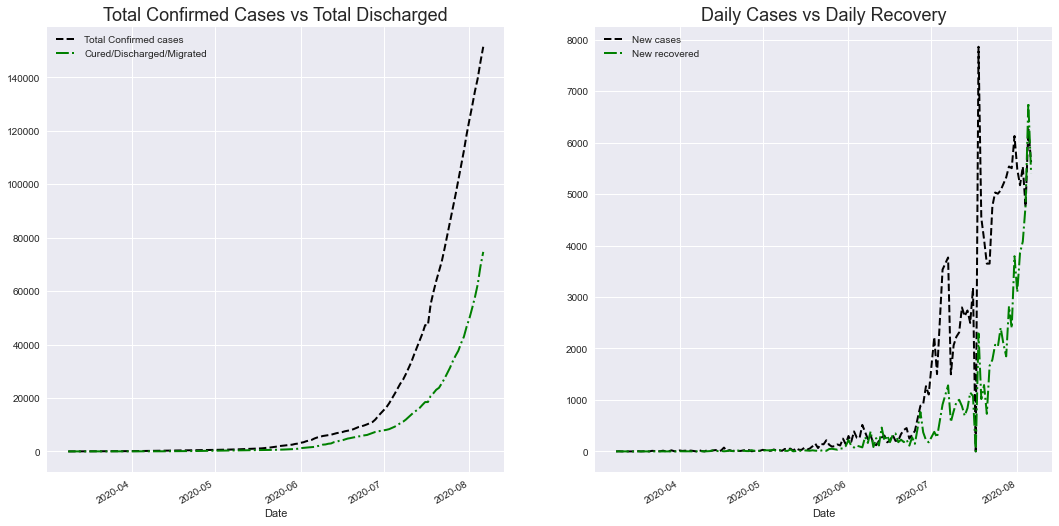

In [46]:
plt.figure(figsize=(18,20))
#Total Confirmed Cases
case=df[df['Name of State / UT']=="Karnataka"]["Total Confirmed cases"]
#Total Cured
cured=df[df['Name of State / UT']=="Karnataka"]["Cured/Discharged/Migrated"]
#Total Deaths
death=df[df['Name of State / UT']=="Karnataka"]["Death"]
#New cases per day
new_case=df[df['Name of State / UT']=="Karnataka"]["New cases"]
#New deaths per day
new_death=df[df['Name of State / UT']=="Karnataka"]["New deaths"]
#New recovery per day
new_recovery=df[df['Name of State / UT']=="Karnataka"]["New recovered"]
#Total Confirmed vs Total Cured
plt.subplot(2,2,1)
case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
cured.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
plt.title('Total Confirmed Cases vs Total Discharged',fontsize=18)
#New cases per day vs Recovery per day
plt.subplot(2,2,2)
new_case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
new_recovery.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
plt.title('Daily Cases vs Daily Recovery',fontsize=18)
#Total Deaths


In [47]:
TN = state_test[state_test['State']=='Tamil Nadu']
Andhra = state_test[state_test['State']=='Andhra Pradesh']
Maharastra = state_test[state_test['State']=='Maharashtra']
karnataka = state_test[state_test['State']=='Karnataka']

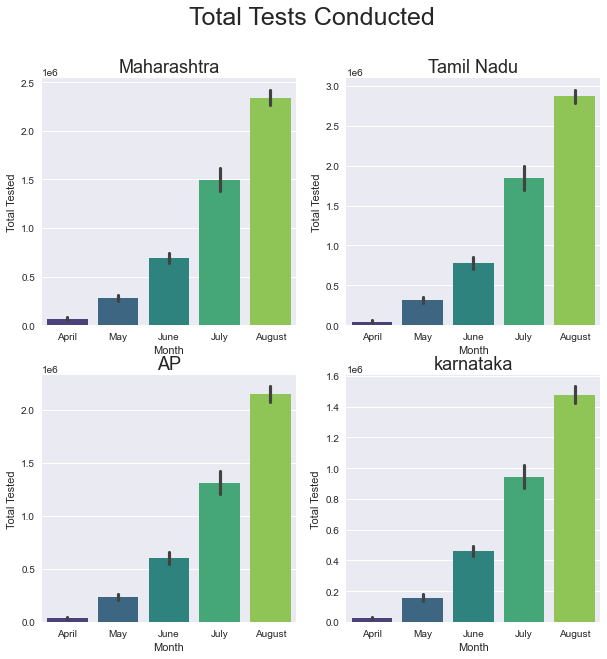

In [49]:
plt.figure(figsize=(10,10))
#Tests Conducted by Maharastra
plt.subplot(2,2,1)
sns.barplot('Month','Total Tested',data=Maharastra,palette='viridis')
plt.title('Maharashtra',fontsize=18)
#Tests Conducted by TamilNadu
plt.subplot(2,2,2)
sns.barplot('Month','Total Tested',data=TN,palette='viridis')
plt.title('Tamil Nadu',fontsize=18);
#Tests Conducted by Delhi
plt.subplot(2,2,3)
sns.barplot('Month','Total Tested',data=Andhra,palette='viridis')
plt.title('AP',fontsize=18)
#Tests Conducted by Gujarat
plt.subplot(2,2,4)
sns.barplot('Month','Total Tested',data=karnataka,palette='viridis')
plt.title('karnataka',fontsize=18)
plt.suptitle('Total Tests Conducted',fontsize=25)
plt.show()
